In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shopping-trends/SHOPPING_TRENDS.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("/kaggle/input/shopping-trends/SHOPPING_TRENDS.csv")

In [25]:
df.shape

(3900, 22)

In [26]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer name,Expiry date,Manufacturing date
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly,NaN,NaN,NaN
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Bank Transfer,Express,Yes,Yes,NaN,Cash,Fortnightly,NaN,NaN,NaN
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly,NaN,NaN,NaN
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly,NaN,NaN,NaN
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually,NaN,NaN,NaN


In [27]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer name,Expiry date,Manufacturing date
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,Cash,2-Day Shipping,No,No,32.0,Venmo,Weekly,NaN,NaN,NaN
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,PayPal,Store Pickup,No,No,41.0,Bank Transfer,Bi-Weekly,NaN,NaN,NaN
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Credit Card,Standard,No,No,24.0,Venmo,Quarterly,NaN,NaN,NaN
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,PayPal,Express,No,No,24.0,Venmo,Weekly,NaN,NaN,NaN
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,...,Bank Transfer,Store Pickup,No,No,33.0,Venmo,Quarterly,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [29]:
df.drop(['Customer name', 'Expiry date','Manufacturing date'], axis=1, inplace=True)

In [30]:
pd.isnull(df)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
pd.isnull(df).sum()

Customer ID                  0
Age                          0
Gender                       0
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Payment Method               0
Shipping Type                0
Discount Applied             0
Promo Code Used              0
Previous Purchases          57
Preferred Payment Method     0
Frequency of Purchases       0
dtype: int64

In [32]:
df.shape

(3900, 19)

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(3843, 19)

In [35]:
pd.isnull(df).sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [36]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,1963.000260,44.085870,59.752277,3.748452,25.638824
std,1121.221439,15.234551,23.700270,0.715806,14.331273
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,993.500000,31.000000,39.000000,3.100000,13.500000
50%,1966.000000,44.000000,60.000000,3.700000,26.000000
75%,2933.500000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [37]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

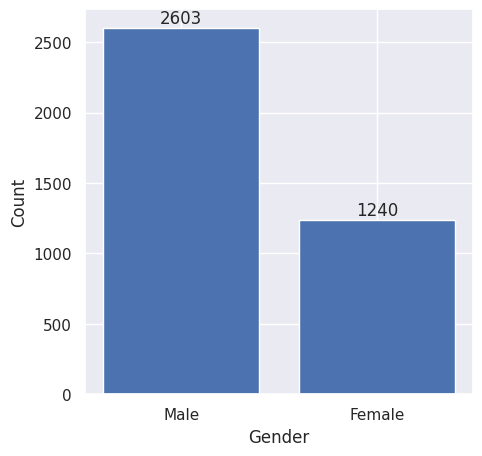

In [38]:
category_counts = df['Gender'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

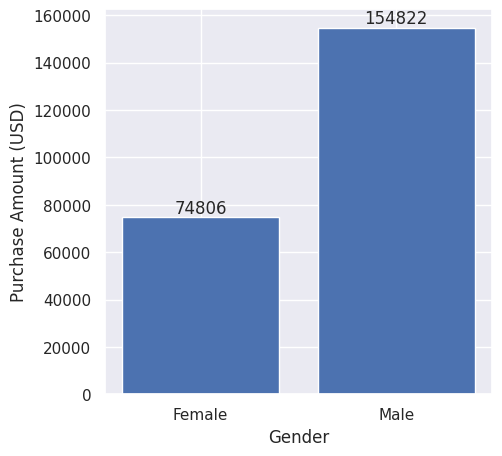

In [39]:
grouped_data = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
a=plt.bar(grouped_data['Gender'], grouped_data['Purchase Amount (USD)'])

for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')

# Display the plot
plt.show()

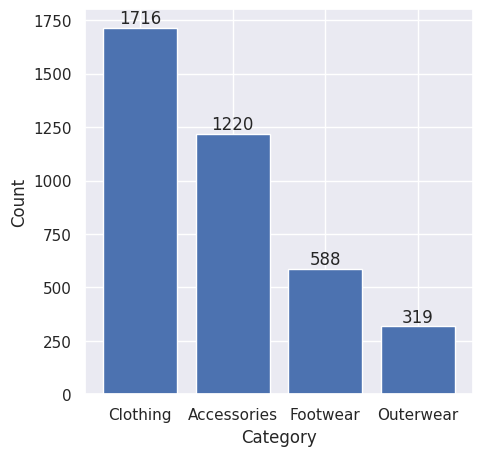

In [40]:
category_counts = df['Category'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(5,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()

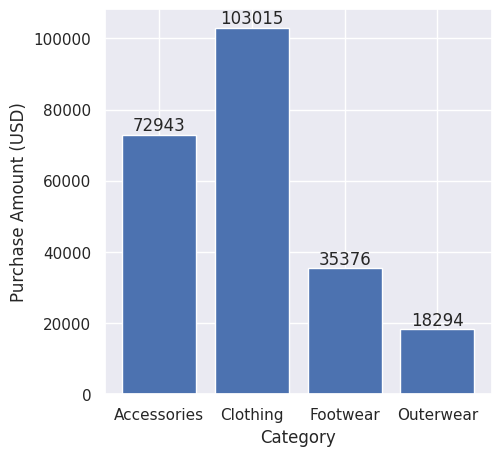

In [41]:
grouped_data = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
a=plt.bar(grouped_data['Category'], grouped_data['Purchase Amount (USD)'])

for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')

# Display the plot
plt.show()

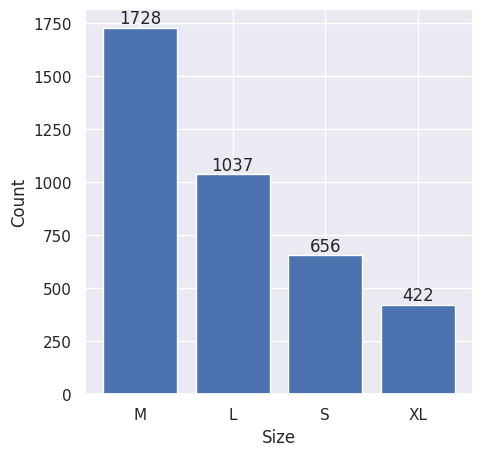

In [42]:
category_counts = df['Size'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(5,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Size')
plt.ylabel('Count')

# Display the plot
plt.show()

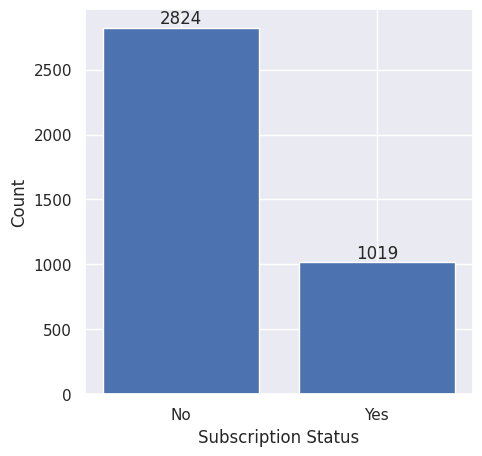

In [43]:
category_counts = df['Subscription Status'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(5,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Subscription Status')
plt.ylabel('Count')

# Display the plot
plt.show()

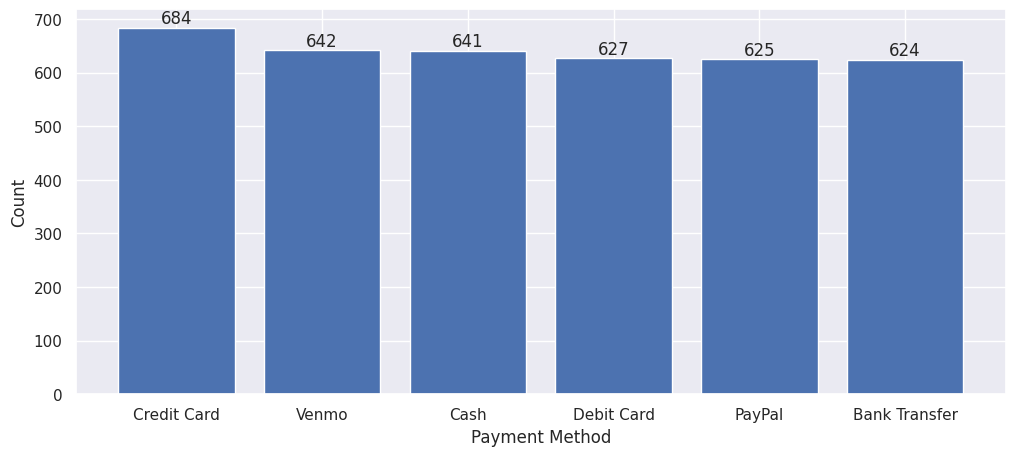

In [47]:
category_counts = df['Payment Method'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(12,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Display the plot
plt.show()


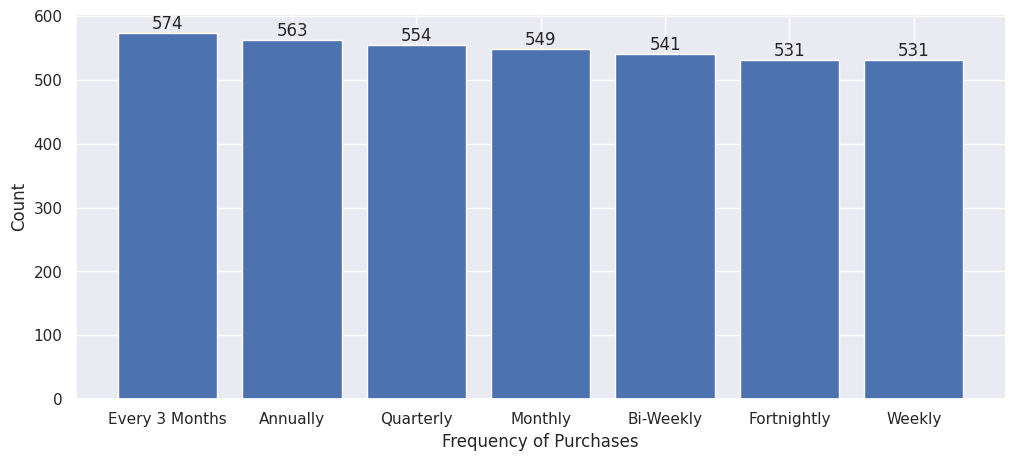

In [45]:
category_counts = df['Frequency of Purchases'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(12,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')

# Display the plot
plt.show()

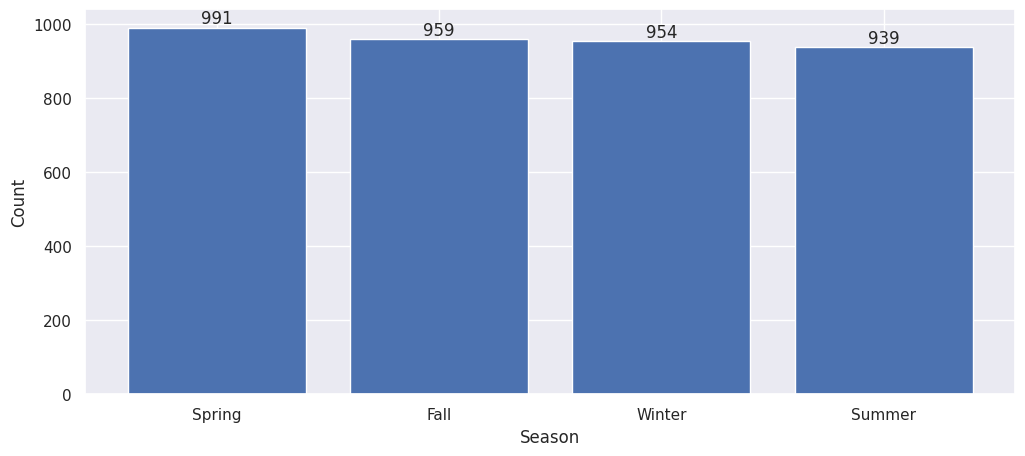

In [46]:
category_counts = df['Season'].value_counts()

# Creating the countplot using Matplotlib
a=plt.bar(category_counts.index, category_counts.values)
sns.set(rc={'figure.figsize':(12,5)})


for bar in a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Count')

# Display the plot
plt.show()

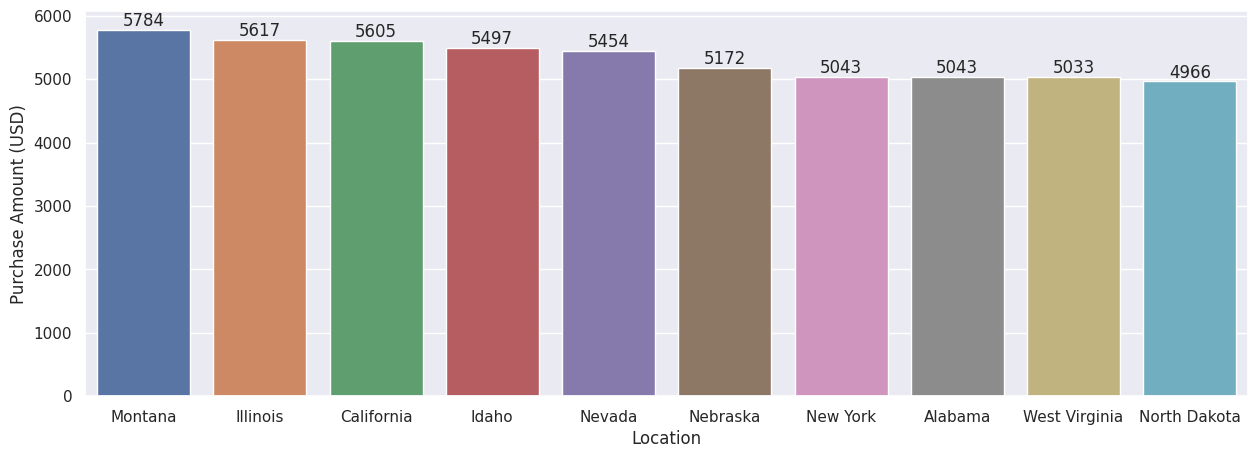

In [48]:
sales_location = df.groupby(['Location'],as_index=False)['Purchase Amount (USD)'].sum().sort_values(by='Purchase Amount (USD)',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'Location',y = 'Purchase Amount (USD)',data = sales_location)

for bars in ax.containers:
    ax.bar_label(bars)

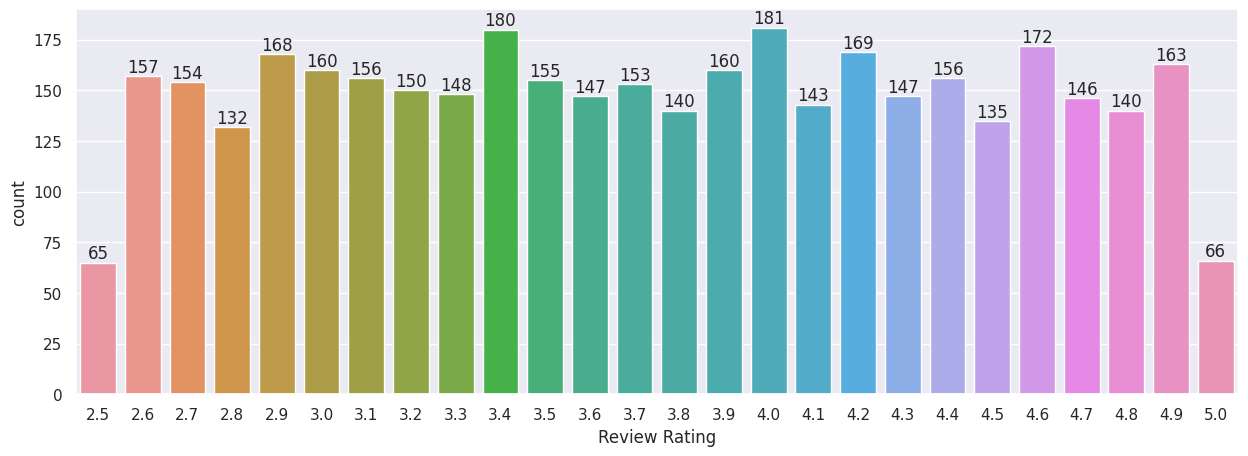

In [49]:
ax = sns.countplot(data = df,x = 'Review Rating')

for bars in ax.containers:
    ax.bar_label(bars)